In [1]:
import pandas as pd
import matplotlib.pyplot as plt

To understand the performance of our magnetic line tracing software, we ran a series of scenarios.  Our software has options that can be selected.  First, we vary the number of points in the unstructured matrix that defines the magnetic field (B field) over space.  The matrix is a collection of random x,y,z points at which the three cartesian components of the B field are specified.  Second, we vary the parameters for scipy ODE solver and the scipy interpolation routine used to integrate over the magnetic field line.  These parameters are tolerance, grid spacing (how far apart are the points on the field line which the solver finds), which ode method is used (i.e., RK23, RK45, or DOP853), and which interpolation method is used (i.e., linear or nearest neighbor).

We systematically vary these parameters:

1. Number of points in B field matrix: $10^4$ to $10^6$
2. Tolerance: $10^{-2}$ to $10^{-5}$
3. Grid spacing: $10^{-1}$ to $10^{-2}$
4. ODE method: RK23, RK45, or DOP853
5. Interpolation method: linear or nearest neighbor

All possible combinations of these parameters are used to trace a dipole magnetic field for which the analytic solution is known.  We collect the elapsed time (wall clock) that the trace procedure requires and the root-mean-square (RMS) difference between the numeric solution and the analytic solution.  We note that the elapsed time includes both the initialization of the interpolation procedure (a one time cost for a given B field matrix) and the tracing of a single magnetic field line.  If we trace over multiple field lines, the initialization of the interpolation procedure would be amortized across all the field lines.  We also note the initialization time is not insignificant for larger B field matrices.

In the first plot, we see the elapsed time to complete the tracing versus the number of points in B field matrix.  The various combinations listed above leads to 120 results, and we see clumps of results.  Not surprisingly, the elapsed time increases with the number of points in the B field matrix.  We also see the results form two groups depending on whether linear (red) or nearest neighbor (blue) interpolation is used.  The elapsed time is smaller for nearest neighbor.  

Similarly, in the second plot, we see RMS difference between the numeric and analytic solutions as a function of number of points in the B field matrix.  We use the same color coding for the interpolation methods.  RMS decreases with the number of points, and we see a grouping of the results based on the interpolation method. 

In deciding whether to use linear or nearest neighbor interpolation, the deciding factor will be whether faster execution (i.e., lower elapsed time) or more accurate results (i.e., lower RMS difference) is important.

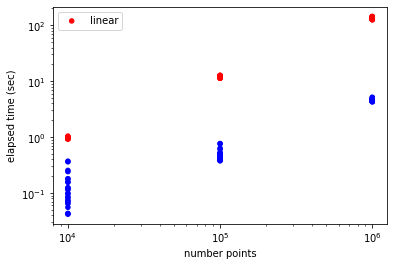

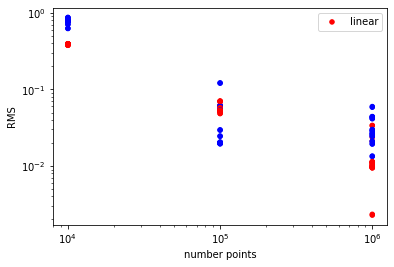

In [2]:
# Read results from timing_trace_unstructured()
results = pd.read_pickle("timing.pkl")

# Add a few columns based on the data in the dataframe
results['tolerance'] = 10**results['log(tolerance)']
results['number points'] = 10**results['log(number points)']
results['grid size'] = 10**results['log(grid size)']

# Plot results to identify patterns
colors = {'linear':'red', 'nearest':'blue'}
results.plot('number points','elapsed time (sec)',kind='scatter', logy=True, logx=True, color=results['method interpolation'].map(colors))
plt.legend(['linear', 'nearest'])
results.plot('number points','RMS',kind='scatter', logy=True, logx=True, color=results['method interpolation'].map(colors))
plt.legend(['linear', 'nearest'])

These effects are more clearly seen in the next two plots that break elapsed time and RMS difference into the two groups based on interpolation method.  The effect described above is obvious.  

<AxesSubplot:xlabel='method interpolation', ylabel='RMS'>

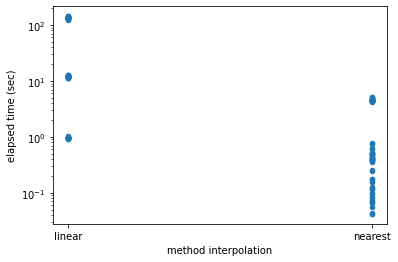

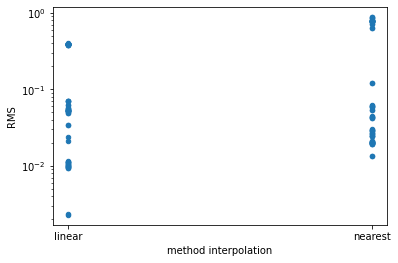

In [3]:
results.plot('method interpolation','elapsed time (sec)',kind='scatter', logy=True)
results.plot('method interpolation','RMS',kind='scatter', logy=True)

We next plot elapsed time and RMS difference versus the remaining parameters to identify potential patterns.  In general, neither elapsed time or RMS difference depends on the other parameters.  We continue to use the same color coding for interpolation method.  We do not see any significant patterns in the results beyond those already discussed.  Elapsed time and RMS difference are largely independent of the other parameters.

<AxesSubplot:xlabel='tolerance', ylabel='RMS'>

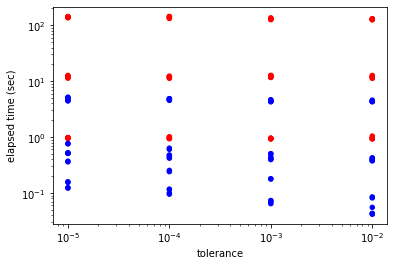

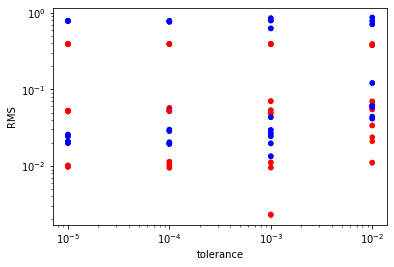

In [4]:
results.plot('tolerance','elapsed time (sec)',kind='scatter', logy=True, logx=True, color=results['method interpolation'].map(colors))
results.plot('tolerance','RMS',kind='scatter', logy=True, logx=True, color=results['method interpolation'].map(colors))

<AxesSubplot:xlabel='grid size', ylabel='RMS'>

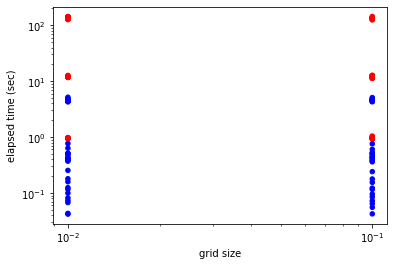

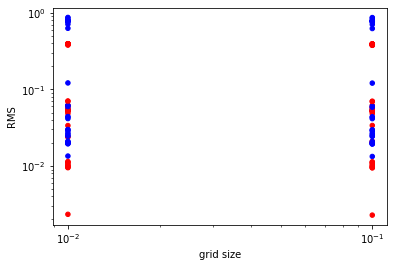

In [5]:
results.plot('grid size','elapsed time (sec)',kind='scatter', logy=True, logx=True, color=results['method interpolation'].map(colors))
results.plot('grid size','RMS',kind='scatter', logy=True, logx=True, color=results['method interpolation'].map(colors))

<AxesSubplot:xlabel='method ode', ylabel='RMS'>

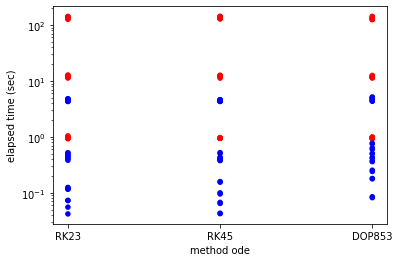

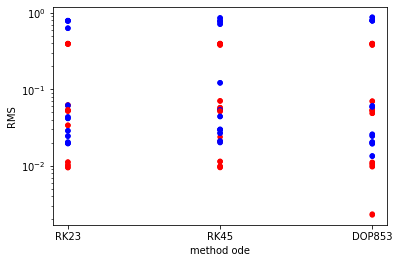

In [6]:
results.plot('method ode','elapsed time (sec)',kind='scatter', logy=True, color=results['method interpolation'].map(colors))
results.plot('method ode','RMS',kind='scatter', logy=True, color=results['method interpolation'].map(colors))